<a href="https://colab.research.google.com/github/deryabol/Machine_Learning/blob/main/random_forest_regression_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/Position_Salaries.csv', sep=",", names=['Position', 'Level', 'Salary'])

In [ ]:
df

,Position,Level,Salary
0,Position,Level,Salary
1,Business Analyst,1,45000
2,Junior Consultant,2,50000
3,Senior Consultant,3,60000
4,Manager,4,80000
5,Country Manager,5,110000
6,Region Manager,6,150000
7,Partner,7,200000
8,Senior Partner,8,300000
9,C-level,9,500000


In [ ]:
le = LabelEncoder()
df['Position'] = le.fit_transform(df['Position'])
df['Salary'] = le.fit_transform(df['Salary'])

In [ ]:
#splitting the df into training and test set
x=df.iloc[1:,[0,-1]].values.reshape(-1,2)  # Start from index 1 to match y
y=df.iloc[1:,1].values.reshape(-1,1)
y = y.astype(np.float64) # no need for slicing here

In [ ]:
#splitting the dataset into training and test set
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42)

In [ ]:
rf.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [ ]:
rf.predict([[7,8]])

array([3.75])

In [ ]:
x_ = np.arange(np.min(x),np.max(x),0.01).reshape(-1,2)

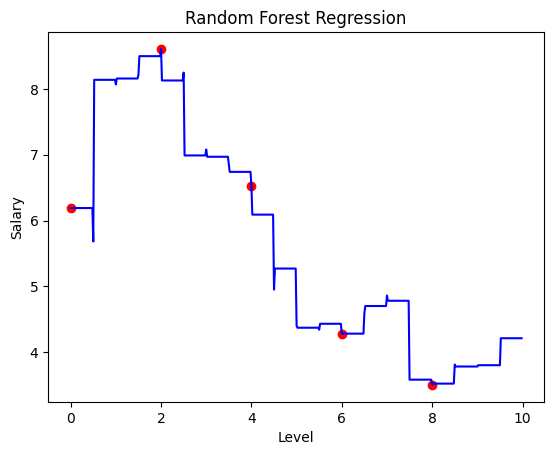

In [ ]:
y_head = rf.predict(x_)
plt.scatter(x_[::100,0],y_head[::100],color='red') # Use x_ and y_head for plotting and sample every 100th point
plt.plot(x_[:,0],y_head,color='blue') # Plot all predicted points as a line
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Random Forest Regression')
plt.show()